# MiniProject 3
### Reza Yarmohamadi

In [1]:
import pandas as pd
import finpy_tse as fpy
import random
import jalali_pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
### getting all stocks data from stock market
all_stocks = fpy.Build_Market_StockList()
all_stocks = all_stocks.reset_index()
all_stocks

Progress : 100 % , Done in 33 seconds!
Save path does not exist, you can handle saving this data by returned dataframe as Excel using ".to_excel()", if you will!
Save path does not exist, you can handle saving this data by returned dataframe as CSV using ".to_csv()", if you will!


,Ticker,Name,Market,Panel,Sector,Sub-Sector,Comment,Name(EN),Company Code(12),Ticker(4),Ticker(5),Ticker(12),Sector Code,Sub-Sector Code,Panel Code
0,آبادا,تولید نیروی برق آبادان,بورس,بازار دوم بورس,عرضه برق، گاز، بخاروآب گرم,تولید انتقال و توزیع نیروی برق,-,Abadan PG,IRO1NBAB0009,NBAB,NBAB1,IRO1NBAB0001,40,4010,5
1,آپ,آسان پرداخت پرشین,بورس,بازار دوم بورس,رایانه و فعالیت های وابسته به آن,مشاوره و تهیه نرم افزار,-,Asan Pardakht Pers,IRO1APPE0008,APPE,APPE1,IRO1APPE0001,72,7220,5
2,آسیا,بیمه آسیا,بورس,بازار اول (تابلوی اصلی) بورس,بیمه وصندوق بازنشستگی به جزتامین اجتماعی,بیمه غیرزندگی,-,Asia Bime,IRO1ASIA0008,ASIA,ASIA1,IRO1ASIA0001,66,6603,1
3,اپال,فرآوری معدنی اپال کانی پارس,بورس,بازار دوم بورس,استخراج کانه های فلزی,استخراج آهن,-,Opal Kani Pars,IRO1OPAL0000,OPAL,OPAL1,IRO1OPAL0001,13,1310,5
4,اتکام,بیمه اتکایی امین,بورس,بازار دوم بورس,بیمه وصندوق بازنشستگی به جزتامین اجتماعی,بیمه غیرزندگی,-,Amin Company,IRO1ETKA0009,ETKA,ETKA1,IRO1ETKA0001,66,6603,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,توسعه,اعتباری توسعه,پایه قرمز,بازار پایه قرمز فرابورس,بانکها و موسسات اعتباری,سایر واسطه های پولی,قانون احکام دائمی برنامه های توسعه کشور/ اظها...,Etebari Dev Co,IRO7TSEP0008,TSEP,TSEP1,IRO7TSEP0001,57,5719,7
712,شپترو,پتروشیمی آبادان,پایه زرد,بازار پایه زرد فرابورس,محصولات شیمیایی,تولید پلاستیک اولیه و لاستیک ترکیبی,لغو پذیرش شده,Abadan Petro.,IRO7APTP0005,APTP,APTP1,IRO7APTP0001,44,4413,7
713,دشیری,شیرین دارو,پایه زرد,بازار پایه زرد فرابورس,مواد و محصولات دارویی,تولید داروهای شیمیایی و گیاهی,لغو پذیرش شده,Shirin Daru,IRO7DSHP0003,DSHP,DSHP1,IRO7DSHP0001,43,4323,7
714,ولتجار,واسپاری تجارت وسرمایه ایرانیان,پایه زرد,بازار پایه زرد فرابورس,سایر واسطه گریهای مالی,لیزینگ مالی,قانون احکام دائمی برنامه های توسعه کشور,Iranian Inv Co,IRO7GSIP0009,GSIP,GSIP1,IRO7GSIP0001,58,5891,7


In [3]:
(all_stocks.groupby('Sector')['Ticker'].count()).sort_values(ascending=False)
### I'll just use sectors that contain at least 30 stocks

Sector
سرمایه گذاریها                              81
محصولات شیمیایی                             63
مواد و محصولات دارویی                       47
فلزات اساسی                                 45
سیمان، آهک و گچ                             42
محصولات غذایی و آشامیدنی به جز قند و شکر    40
خودرو و ساخت قطعات                          36
انبوه سازی، املاک و مستغلات                 34
سایر محصولات کانی غیرفلزی                   27
بیمه وصندوق بازنشستگی به جزتامین اجتماعی    26
بانکها و موسسات اعتباری                     23
زراعت و خدمات وابسته                        19
قند و شکر                                   18
رایانه و فعالیت های وابسته به آن            17
حمل ونقل، انبارداری و ارتباطات              17
استخراج کانه های فلزی                       16
ماشین آلات و تجهیزات                        15
فراورده های نفتی، کک و سوخت هسته ای         13
سایر واسطه گریهای مالی                      13
عرضه برق، گاز، بخاروآب گرم                  12
لاستیک و پلاستیک                            11
فعالیت

In [4]:
#### Sectors that include at least 30 stocks
sectors = list(((all_stocks.groupby('Sector')['Ticker'].count()).sort_values(ascending=False)[:8]).index)
sectors

['سرمایه گذاریها',
 'محصولات شیمیایی',
 'مواد و محصولات دارویی',
 'فلزات اساسی',
 'سیمان، آهک و گچ',
 'محصولات غذایی و آشامیدنی به جز قند و شکر',
 'خودرو و ساخت قطعات',
 'انبوه سازی، املاک و مستغلات']

In [18]:
### Market return
index = fpy.Get_CWI_History(start_date='1396-02-01', end_date='1401-2-31', double_date=True)
index.reset_index(inplace=True)
index["J-Date"] = index["Date"].jalali.to_jalali()
index['year'] = index["J-Date"].jalali.year
index['month'] = index["J-Date"].jalali.month
index['weekday'] = index["J-Date"].jalali.weekday
index.dropna(inplace=True)
index = index.groupby(['year', 'month']).max('Date')
index_ret = index['Adj Close'].pct_change()
index_ret.dropna(inplace=True)
index_ret = index_ret.reset_index()
index_ret.columns = ['year', 'month', 'return']
index_ret.head()

,year,month,return
0,1396,3,-0.000589
1,1396,4,-0.005859
2,1396,5,0.021093
3,1396,6,0.041997
4,1396,7,0.007554


In the next 8 block, I derive monthly return of each sectors.

In [20]:
### Investments return (سرمایه گذاری ها)
investments_return = fpy.Get_SectorIndex_History(sector="سرمایه گذاریها", start_date='1396-02-01', end_date='1401-2-31',  double_date=True)
investments_return.reset_index(inplace=True)
investments_return["J-Date"] = investments_return["Date"].jalali.to_jalali()
investments_return['year'] = investments_return["J-Date"].jalali.year
investments_return['month'] = investments_return["J-Date"].jalali.month
investments_return['weekday'] = investments_return["J-Date"].jalali.weekday
investments_return.dropna(inplace=True)
investments_return = investments_return.groupby(['year', 'month']).max('Date')
investments_return = investments_return['Adj Close'].pct_change()
investments_return.dropna(inplace=True)
investments_return = investments_return.reset_index()
investments_return.columns = ['year', 'month', 'return']
investments_return.head()

,year,month,return
0,1396,3,0.011710
1,1396,4,-0.042900
2,1396,5,0.000206
3,1396,6,-0.001183
4,1396,7,0.011899


In [21]:
### Chemical Products return (محصولات شیمیایی)
Chemical_Products_return = fpy.Get_SectorIndex_History(sector="محصولات شیمیایی", start_date='1396-02-01', end_date='1401-2-31',  double_date=True)
Chemical_Products_return.reset_index(inplace=True)
Chemical_Products_return["J-Date"] = Chemical_Products_return["Date"].jalali.to_jalali()
Chemical_Products_return['year'] = Chemical_Products_return["J-Date"].jalali.year
Chemical_Products_return['month'] = Chemical_Products_return["J-Date"].jalali.month
Chemical_Products_return['weekday'] = Chemical_Products_return["J-Date"].jalali.weekday
Chemical_Products_return.dropna(inplace=True)
Chemical_Products_return = Chemical_Products_return.groupby(['year', 'month']).max('Date')
Chemical_Products_return = Chemical_Products_return['Adj Close'].pct_change()
Chemical_Products_return.dropna(inplace=True)
Chemical_Products_return = Chemical_Products_return.reset_index()
Chemical_Products_return.columns = ['year', 'month', 'return']
Chemical_Products_return.head()

,year,month,return
0,1396,3,0.001730
1,1396,4,-0.026231
2,1396,5,-0.008638
3,1396,6,0.063458
4,1396,7,0.011301


In [24]:
### Pharmaceutical return (مواد و محصولات دارویی)
Pharmaceutical_return = fpy.Get_SectorIndex_History(sector="مواد و محصولات دارویی", start_date='1396-02-01', end_date='1401-2-31',  double_date=True)
Pharmaceutical_return.reset_index(inplace=True)
Pharmaceutical_return["J-Date"] = Pharmaceutical_return["Date"].jalali.to_jalali()
Pharmaceutical_return['year'] = Pharmaceutical_return["J-Date"].jalali.year
Pharmaceutical_return['month'] = Pharmaceutical_return["J-Date"].jalali.month
Pharmaceutical_return['weekday'] = Pharmaceutical_return["J-Date"].jalali.weekday
Pharmaceutical_return.dropna(inplace=True)
Pharmaceutical_return = Pharmaceutical_return.groupby(['year', 'month']).max('Date')
Pharmaceutical_return = Pharmaceutical_return['Adj Close'].pct_change()
Pharmaceutical_return.dropna(inplace=True)
Pharmaceutical_return = Pharmaceutical_return.reset_index()
Pharmaceutical_return.columns = ['year', 'month', 'return']
Pharmaceutical_return.head()

,year,month,return
0,1396,3,0.009427
1,1396,4,-0.013925
2,1396,5,-0.029105
3,1396,6,0.012198
4,1396,7,-0.002564


In [25]:
### Basic Metals return (فلزات اساسی)
Basic_Metals_return = fpy.Get_SectorIndex_History(sector="فلزات اساسی", start_date='1396-02-01', end_date='1401-2-31',  double_date=True)
Basic_Metals_return.reset_index(inplace=True)
Basic_Metals_return["J-Date"] = Basic_Metals_return["Date"].jalali.to_jalali()
Basic_Metals_return['year'] = Basic_Metals_return["J-Date"].jalali.year
Basic_Metals_return['month'] = Basic_Metals_return["J-Date"].jalali.month
Basic_Metals_return['weekday'] = Basic_Metals_return["J-Date"].jalali.weekday
Basic_Metals_return.dropna(inplace=True)
Basic_Metals_return = Basic_Metals_return.groupby(['year', 'month']).max('Date')
Basic_Metals_return = Basic_Metals_return['Adj Close'].pct_change()
Basic_Metals_return.dropna(inplace=True)
Basic_Metals_return = Basic_Metals_return.reset_index()
Basic_Metals_return.columns = ['year', 'month', 'return']
Basic_Metals_return.head()

,year,month,return
0,1396,3,0.001278
1,1396,4,0.081306
2,1396,5,0.197063
3,1396,6,0.060771
4,1396,7,0.051313


In [32]:
### Cement, Lime and Gypsum return (سیمان، آهک و گچ)
CLG_return = fpy.Get_SectorIndex_History(sector="سیمان", start_date='1396-02-01', end_date='1401-2-31',  double_date=True)
CLG_return.reset_index(inplace=True)
CLG_return["J-Date"] = CLG_return["Date"].jalali.to_jalali()
CLG_return['year'] = CLG_return["J-Date"].jalali.year
CLG_return['month'] = CLG_return["J-Date"].jalali.month
CLG_return['weekday'] = CLG_return["J-Date"].jalali.weekday
CLG_return.dropna(inplace=True)
CLG_return = CLG_return.groupby(['year', 'month']).max('Date')
CLG_return = CLG_return['Adj Close'].pct_change()
CLG_return.dropna(inplace=True)
CLG_return = CLG_return.reset_index()
CLG_return.columns = ['year', 'month', 'return']
CLG_return.head()

,year,month,return
0,1396,3,-0.026246
1,1396,4,-0.014086
2,1396,5,0.024317
3,1396,6,-0.060891
4,1396,7,-0.034276


In [26]:
### Food and Bevrages return (محصولات غذایی و آشامیدنی به جز قند و شکر)
Food_Bevrages_return = fpy.Get_SectorIndex_History(sector="سیمان", start_date='1396-02-01', end_date='1401-2-31',  double_date=True)
Food_Bevrages_return.reset_index(inplace=True)
Food_Bevrages_return["J-Date"] = Food_Bevrages_return["Date"].jalali.to_jalali()
Food_Bevrages_return['year'] = Food_Bevrages_return["J-Date"].jalali.year
Food_Bevrages_return['month'] = Food_Bevrages_return["J-Date"].jalali.month
Food_Bevrages_return['weekday'] = Food_Bevrages_return["J-Date"].jalali.weekday
Food_Bevrages_return.dropna(inplace=True)
Food_Bevrages_return = Food_Bevrages_return.groupby(['year', 'month']).max('Date')
Food_Bevrages_return = Food_Bevrages_return['Adj Close'].pct_change()
Food_Bevrages_return.dropna(inplace=True)
Food_Bevrages_return = Food_Bevrages_return.reset_index()
Food_Bevrages_return.columns = ['year', 'month', 'return']
Food_Bevrages_return.head()

,year,month,return
0,1396,3,-0.026246
1,1396,4,-0.014086
2,1396,5,0.024317
3,1396,6,-0.060891
4,1396,7,-0.034276


In [27]:
### Car and Parts Manufacturing return (خودرو و ساخت قطعات)
Car_Parts_return = fpy.Get_SectorIndex_History(sector="خودرو و ساخت قطعات", start_date='1396-02-01', end_date='1401-2-31',  double_date=True)
Car_Parts_return.reset_index(inplace=True)
Car_Parts_return["J-Date"] = Car_Parts_return["Date"].jalali.to_jalali()
Car_Parts_return['year'] = Car_Parts_return["J-Date"].jalali.year
Car_Parts_return['month'] = Car_Parts_return["J-Date"].jalali.month
Car_Parts_return['weekday'] = Car_Parts_return["J-Date"].jalali.weekday
Car_Parts_return.dropna(inplace=True)
Car_Parts_return = Car_Parts_return.groupby(['year', 'month']).max('Date')
Car_Parts_return = Car_Parts_return['Adj Close'].pct_change()
Car_Parts_return.dropna(inplace=True)
Car_Parts_return = Car_Parts_return.reset_index()
Car_Parts_return.columns = ['year', 'month', 'return']
Car_Parts_return.head()

,year,month,return
0,1396,3,-0.040435
1,1396,4,-0.040568
2,1396,5,0.000892
3,1396,6,-0.022349
4,1396,7,-0.021021


In [28]:
### Real State return (انبوه سازی، املاک و مستغلات)
Real_States_return = fpy.Get_SectorIndex_History(sector="انبوه سازی، املاک و مستغلات", start_date='1396-02-01', end_date='1401-2-31',  double_date=True)
Real_States_return.reset_index(inplace=True)
Real_States_return["J-Date"] = Real_States_return["Date"].jalali.to_jalali()
Real_States_return['year'] = Real_States_return["J-Date"].jalali.year
Real_States_return['month'] = Real_States_return["J-Date"].jalali.month
Real_States_return['weekday'] = Real_States_return["J-Date"].jalali.weekday
Real_States_return.dropna(inplace=True)
Real_States_return = Real_States_return.groupby(['year', 'month']).max('Date')
Real_States_return = Real_States_return['Adj Close'].pct_change()
Real_States_return.dropna(inplace=True)
Real_States_return = Real_States_return.reset_index()
Real_States_return.columns = ['year', 'month', 'return']
Real_States_return.head()

,year,month,return
0,1396,3,-0.033731
1,1396,4,0.009326
2,1396,5,0.004745
3,1396,6,-0.078911
4,1396,7,-0.058824


In [35]:
#### Building Panel Data
panel_columns = {'Ticker':[], 'Year':[], 'Stock Return':[], 'Month':[], 'Market Return':[], 'Invsestmets':[], 'Chemical Products':[], 'Pharmaceutical':[],
                'Basic Metals':[], 'Cement, Lime and Gypsum':[], 'Food and Bevrages':[], 'Car and Parts Manufacturing':[], 'Real States':[]}
panel_data = pd.DataFrame(panel_columns)
panel_data

,Ticker,Year,Stock Return,Month,Market Return,Invsestmets,Chemical Products,Pharmaceutical,Basic Metals,"Cement, Lime and Gypsum",Food and Bevrages,Car and Parts Manufacturing,Real States


In [36]:
for i in sectors:
    temp_sector = all_stocks[all_stocks['Sector'] == i]
    temp_tickers = temp_sector['Ticker']
    ### I just use 30 of the stocks in each sector (because it's very time consumming)
    num_s = 0
    for stock in temp_tickers:
        num_s+=1
        if num_s == 31: break
        s = fpy.Get_Price_History(stock="ثاباد", start_date='1396-02-01', end_date='1401-2-31',  double_date=True, adjust_price=True)
        s.reset_index(inplace=True)
        s["J-Date"] = s["Date"].jalali.to_jalali()
        s['year'] = s["J-Date"].jalali.year
        s['month'] = s["J-Date"].jalali.month
        s['weekday'] = s["J-Date"].jalali.weekday
        s.dropna(inplace=True)
        s = s.groupby(['year', 'month']).max('Date')
        s = s['Adj Close'].pct_change()
        s.dropna(inplace=True)
        s = s.reset_index()

        counter = 0
        for index, row in s.iterrows():
            temp_row = {'Ticker':stock, 'Year':s['year'][counter], 'Stock Return':s['Adj Close'][counter], 'Month':s['month'][counter],
                'Market Return':index_ret[(index_ret['year'] == s['year'][counter]) & (index_ret['month'] == s['month'][counter])]['return'].iloc[0],
                'Invsestmets':investments_return[(investments_return['year'] == s['year'][counter]) & (investments_return['month'] ==s['month'][counter])]['return'].iloc[0],
                'Chemical Products':Chemical_Products_return[(Chemical_Products_return['year'] == s['year'][counter]) & (Chemical_Products_return['month'] == s['month'][counter])]['return'].iloc[0],
                'Pharmaceutical':Pharmaceutical_return[(Pharmaceutical_return['year'] == s['year'][counter]) & (Pharmaceutical_return['month'] == s['month'][counter])]['return'].iloc[0],
                'Basic Metals':Basic_Metals_return[(Basic_Metals_return['year'] == s['year'][counter]) & (Basic_Metals_return['month'] == s['month'][counter])]['return'].iloc[0],
                'Cement, Lime and Gypsum':CLG_return[(CLG_return['year'] == s['year'][counter]) & (CLG_return['month'] == s['month'][counter])]['return'].iloc[0],
                'Food and Bevrages':Food_Bevrages_return[(Food_Bevrages_return['year'] == s['year'][counter]) & (Food_Bevrages_return['month'] == s['month'][counter])]['return'].iloc[0],
                'Car and Parts Manufacturing':Car_Parts_return[(Car_Parts_return['year'] == s['year'][counter]) & (Car_Parts_return['month'] == s['month'][counter])]['return'].iloc[0],
                'Real States':Real_States_return[(Real_States_return['year'] == s['year'][counter]) & (Real_States_return['month'] == s['month'][counter])]['return'].iloc[0]}
            panel_data = panel_data.append(temp_row, ignore_index=True)
            counter += 1
panel_data

,Ticker,Year,Stock Return,Month,Market Return,Invsestmets,Chemical Products,Pharmaceutical,Basic Metals,"Cement, Lime and Gypsum",Food and Bevrages,Car and Parts Manufacturing,Real States
0,پردیس,1396.0,0.217274,3.0,-0.000589,0.011710,0.001730,0.009427,0.001278,-0.026246,-0.026246,-0.040435,-0.033731
1,پردیس,1396.0,0.205929,4.0,-0.005859,-0.042900,-0.026231,-0.013925,0.081306,-0.014086,-0.014086,-0.040568,0.009326
2,پردیس,1396.0,-0.023536,5.0,0.021093,0.000206,-0.008638,-0.029105,0.197063,0.024317,0.024317,0.000892,0.004745
3,پردیس,1396.0,-0.234601,6.0,0.041997,-0.001183,0.063458,0.012198,0.060771,-0.060891,-0.060891,-0.022349,-0.078911
4,پردیس,1396.0,-0.096221,7.0,0.007554,0.011899,0.011301,-0.002564,0.051313,-0.034276,-0.034276,-0.021021,-0.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,کیسون,1400.0,-0.153976,10.0,-0.004846,-0.012670,0.000892,-0.112614,0.023124,-0.027980,-0.027980,-0.049970,-0.095328
14396,کیسون,1400.0,0.060762,11.0,-0.068487,-0.028341,-0.124044,-0.066883,-0.053756,-0.088535,-0.088535,-0.033623,-0.166078
14397,کیسون,1400.0,-0.034594,12.0,0.048174,0.013368,0.044429,-0.028514,0.008584,0.094676,0.094676,0.087142,0.044275
14398,کیسون,1401.0,0.041883,1.0,0.106678,0.039028,0.164396,0.142416,0.082910,0.204425,0.204425,0.134982,0.130407


In [37]:
### Regression on panel data
Y = panel_data['Stock Return']
X = panel_data.drop(['Stock Return','Ticker','Year','Month'], axis=1)
model = sm.OLS(Y,X)
results = model.fit()
results.params

Market Return                  1.268517
Invsestmets                   -0.215229
Chemical Products             -1.354754
Pharmaceutical                 0.274756
Basic Metals                   0.249275
Cement, Lime and Gypsum        0.027440
Food and Bevrages              0.027440
Car and Parts Manufacturing   -0.152052
Real States                    0.717250
dtype: float64

In [38]:
results.f_pvalue

0.0

In [39]:
results.tvalues

Market Return                  20.379199
Invsestmets                    -9.840398
Chemical Products             -39.352127
Pharmaceutical                 16.424036
Basic Metals                   10.330979
Cement, Lime and Gypsum         3.430602
Food and Bevrages               3.430602
Car and Parts Manufacturing   -13.404553
Real States                    40.955580
dtype: float64

So industry is a strong risk factor.

# Part 2

In [40]:
large_small = pd.read_excel('large_and_small_stocks.xlsx')
large_small.dropna(axis=1, inplace=True)
large_small

,largeCaps,smallCaps
0,فارس,كتوكا
1,وغدير,زنگان
2,مارون,قمرو
3,فولاد,خكمك
4,تاپيكو,فالوم
5,حكشتي,سخواف
6,پارسان,ثقزوي
7,وبملت,فرآور
8,رمپنا,چكاوه
9,جم,ثنور


In [41]:
### This function check that if stocks in 'large_small' have 60 month in them or not, if they dont this function add missing months with zero return.
def checker(x):
    for year in range(1396, 1401+1):
        for month in range(1,12+1):
            if year == 1396 and month < 3 :
                continue
            if year == 1401 and month == 3:
                break
            if not ((x['year'] == year) & (x['month'] == month)).any():
                row = {'year':year, 'month':month, 'Adj Close': 0}
                x = x.append(row, ignore_index=True)
    x = x.sort_values(['year', 'month']).reset_index(drop=True)
    return x

In [61]:
### monthly return for large caps
large_data = list()
for large in large_small['largeCaps']:
    large = fpy.Get_Price_History(stock=large, start_date='1396-02-01', end_date='1401-2-31',  double_date=True, adjust_price=True)
    large.reset_index(inplace=True)
    large["J-Date"] = large["Date"].jalali.to_jalali()
    large['year'] = large["J-Date"].jalali.year
    large['month'] = large["J-Date"].jalali.month
    large['weekday'] = large["J-Date"].jalali.weekday
    large.dropna(inplace=True)
    large = large.groupby(['year', 'month']).max('Date')
    large = large['Adj Close'].pct_change()
    large.dropna(inplace=True)
    large = large.reset_index()
    large = checker(large)
    large.columns = ['year', 'month', 'return']
    large_data.append(large)

In [62]:
### monthly return for small caps
small_data = list()
for small in large_small['smallCaps']:
    small = fpy.Get_Price_History(stock=small, start_date='1396-02-01', end_date='1401-2-31',  double_date=True, adjust_price=True)
    small.reset_index(inplace=True)
    small["J-Date"] = small["Date"].jalali.to_jalali()
    small['year'] = small["J-Date"].jalali.year
    small['month'] = small["J-Date"].jalali.month
    small['weekday'] = small["J-Date"].jalali.weekday
    small.dropna(inplace=True)
    small = small.groupby(['year', 'month']).max('Date')
    small = small['Adj Close'].pct_change()
    small.dropna(inplace=True)
    small = small.reset_index()
    small = checker(small)
    small.columns = ['year', 'month', 'return']
    small_data.append(small)

In [63]:
#### Building Panel Data 2
panel_columns_2 = {'Portfolio':[], 'Year':[], 'Month':[], 'Portfolio Return':[], 'Market Return':[], 'Size_dummy':[]}
panel_data_2 = pd.DataFrame(panel_columns_2)
panel_data_2

### if a stock is large cap, dummy will be 1, otherwise it will be zero.

,Portfolio,Year,Month,Portfolio Return,Market Return,Size_dummy


In [64]:
counter = 0
for n in range(100):
    counter += 1
    second_counter = 0
    small_sample = random.sample(small_data, 20)
    portfo_small = sum(small_sample) / 20
    for index, row in portfo_small.iterrows():
        temp = {'Portfolio':counter*2-1, 'Year':portfo_small['year'][second_counter], 'Month':portfo_small['month'][second_counter],
        'Portfolio Return':portfo_small['return'][second_counter],
        'Market Return':index_ret[(index_ret['year'] == portfo_small['year'][second_counter]) & (index_ret['month'] == portfo_small['month'][second_counter])]['return'].iloc[0],
        'Size_dummy':0}
        second_counter += 1
        panel_data_2 = panel_data_2.append(temp, ignore_index=True)

    large_sample = random.sample(large_data, 20)
    portfo_large = sum(large_sample) / 20
    second_counter = 0
    for index, row in portfo_large.iterrows():
        temp = {'Portfolio':counter*2, 'Year':portfo_large['year'][second_counter], 'Month':portfo_large['month'][second_counter],
        'Portfolio Return':portfo_large['return'][second_counter],
        'Market Return':index_ret[(index_ret['year'] == portfo_large['year'][second_counter]) & (index_ret['month'] == portfo_large['month'][second_counter])]['return'].iloc[0],
        'Size_dummy':1}
        second_counter += 1
        panel_data_2 = panel_data_2.append(temp, ignore_index=True)

panel_data_2

,Portfolio,Year,Month,Portfolio Return,Market Return,Size_dummy
0,1.0,1396.0,3.0,0.041772,-0.000589,0.0
1,1.0,1396.0,4.0,0.087895,-0.005859,0.0
2,1.0,1396.0,5.0,0.021980,0.021093,0.0
3,1.0,1396.0,6.0,-0.002650,0.041997,0.0
4,1.0,1396.0,7.0,-0.051295,0.007554,0.0
...,...,...,...,...,...,...
11995,200.0,1400.0,10.0,-0.023656,-0.004846,1.0
11996,200.0,1400.0,11.0,-0.055616,-0.068487,1.0
11997,200.0,1400.0,12.0,0.043382,0.048174,1.0
11998,200.0,1401.0,1.0,0.171758,0.106678,1.0


In [65]:
Y = panel_data_2['Portfolio Return']
X = panel_data_2.drop(['Portfolio Return','Portfolio','Year','Month'], axis=1)
model = sm.OLS(Y,X)
results = model.fit()
results.params

Market Return    0.917298
Size_dummy       0.009300
dtype: float64

In [66]:
results.tvalues

Market Return    146.197984
Size_dummy         7.593256
dtype: float64

So 'Size' is a risk factor.

In [67]:
### Sharpe ratio
### Odd portofolios contain small stocks
### Even portofolios contain large stocks
yearly_return = (panel_data_2.groupby(['Portfolio'])['Portfolio Return'].sum()) / 5
yearly_std = (panel_data_2.groupby(['Portfolio'])['Portfolio Return'].std()) * (12**0.5)
sharpe = yearly_return / yearly_std
sharpe

Portfolio
1.0      1.618870
2.0      1.384922
3.0      1.702577
4.0      1.495924
5.0      1.655575
           ...   
196.0    1.539290
197.0    1.702164
198.0    1.374826
199.0    1.649652
200.0    1.450577
Name: Portfolio Return, Length: 200, dtype: float64

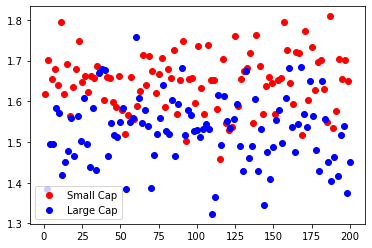

In [72]:
pd.DataFrame(sharpe[1:200:2])
plt.scatter(pd.DataFrame(sharpe[1:200:2]).index,(pd.DataFrame(sharpe[1:200:2]))['Portfolio Return'],color='red', label='Small Cap')
plt.scatter(pd.DataFrame(sharpe[2:200:2]).index,(pd.DataFrame(sharpe[2:200:2]))['Portfolio Return'],color='blue', label='Large Cap')
plt.legend();

Small caps have higher yearly sharpe ratio.

# Part 3

In [78]:
#### Building Panel Data 3
panel_columns_3 = {'Stock':[], 'Year':[], 'Month':[], 'Portfolio Return':[], 'Market Return':[], 'SMB':[]}
panel_data_3 = pd.DataFrame(panel_columns_3)
panel_data_3

,Stock,Year,Month,Portfolio Return,Market Return,SMB


In [79]:
### SMB
large_cap_return = sum(large_data) / 50
small_cap_return = sum(small_data) / 50

SMB = small_cap_return['return'] - large_cap_return['return']
SMB

0     0.027807
1     0.052996
2     0.016278
3    -0.028034
4    -0.030131
5    -0.007549
6    -0.106203
7    -0.060812
8     0.042710
9    -0.002939
10   -0.040396
11    0.032623
12   -0.088275
13   -0.039445
14   -0.142259
15    0.423589
16   -0.039909
17   -0.095306
18    0.068891
19    0.036485
20    0.114159
21   -0.021772
22    0.044703
23    0.161696
24    0.125065
25    0.096770
26    0.168653
27    0.031835
28   -0.028292
29    0.049511
30    0.267861
31   -0.009442
32    0.075944
33    0.084490
34   -0.145671
35   -0.375961
36   -0.017131
37   -0.245972
38    0.026549
39    0.071687
40    0.021072
41    0.138829
42    0.042480
43    0.278391
44    0.118516
45   -0.082284
46   -0.041847
47    0.034385
48   -0.070051
49   -0.183709
50   -0.159597
51    0.018117
52   -0.048140
53   -0.054842
54   -0.005859
55   -0.080733
56   -0.034588
57   -0.027234
58   -0.012862
59    0.084897
Name: return, dtype: float64

In [80]:
counter = 0
for stock in small_data:
    second_counter = 0
    counter += 1
    for index, row in stock.iterrows():
        temp = {'Stock':counter, 'Year':stock['year'][second_counter], 'Month':stock['month'][second_counter],
        'Portfolio Return':stock['return'][second_counter],
        'Market Return':stock[(index_ret['year'] == stock['year'][second_counter]) & (index_ret['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'SMB':SMB[second_counter]}
        second_counter += 1
        panel_data_3 = panel_data_3.append(temp, ignore_index=True)

for stock in large_data:
    second_counter = 0
    counter += 1
    for index, row in stock.iterrows():
        temp = {'Stock':counter, 'Year':stock['year'][second_counter], 'Month':stock['month'][second_counter],
        'Portfolio Return':stock['return'][second_counter],
        'Market Return':stock[(index_ret['year'] == stock['year'][second_counter]) & (index_ret['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'SMB':SMB[second_counter]}
        second_counter += 1
        panel_data_3 = panel_data_3.append(temp, ignore_index=True)

panel_data_3

,Stock,Year,Month,Portfolio Return,Market Return,SMB
0,1.0,1396.0,3.0,-0.096983,-0.096983,0.027807
1,1.0,1396.0,4.0,-0.033413,-0.033413,0.052996
2,1.0,1396.0,5.0,-0.032099,-0.032099,0.016278
3,1.0,1396.0,6.0,-0.005102,-0.005102,-0.028034
4,1.0,1396.0,7.0,0.025641,0.025641,-0.030131
...,...,...,...,...,...,...
5995,100.0,1400.0,10.0,0.004405,0.004405,-0.080733
5996,100.0,1400.0,11.0,-0.153509,-0.153509,-0.034588
5997,100.0,1400.0,12.0,0.088083,0.088083,-0.027234
5998,100.0,1401.0,1.0,0.220952,0.220952,-0.012862


In [84]:
Y = panel_data_3['Portfolio Return']
X = panel_data_3.drop(['Portfolio Return','Stock','Year','Month'], axis=1)
model = sm.OLS(Y,X)
results = model.fit()
results.params

Market Return    1.000000e+00
SMB             -1.610718e-17
dtype: float64

Beta for market is larger than panel 2

In [85]:
results.tvalues

Market Return    4.951127e+16
SMB             -4.140901e-01
dtype: float64

SMB is significant

Let's add industries to the model

In [86]:
#### Finding industry in 'large_small'
industries_temp = []
industries = []
for i in range(50):
    industries_temp.append(all_stocks[all_stocks['Ticker'] == large_small.values[i][0]]['Sector'])
    industries_temp.append(all_stocks[all_stocks['Ticker'] == large_small.values[i][1]]['Sector'])


for i in range(len(industries_temp)):
    if len(industries_temp[i]) != 0:
        industries.append(industries_temp[i].values[0])

industries = list(dict.fromkeys(industries))

In [87]:
len(industries)

16

In [91]:
### This function request sector data and calculate it's monthly return.
def industry_data(x):
    industry = fpy.Get_SectorIndex_History(sector=x, start_date='1396-02-01', end_date='1401-2-31',  double_date=True)
    industry.reset_index(inplace=True)
    industry["J-Date"] = industry["Date"].jalali.to_jalali()
    industry['year'] = industry["J-Date"].jalali.year
    industry['month'] = industry["J-Date"].jalali.month
    industry['weekday'] = industry["J-Date"].jalali.weekday
    industry.dropna(inplace=True)
    industry = industry.groupby(['year', 'month']).max('Date')
    industry = industry['Adj Close'].pct_change()
    industry.dropna(inplace=True)
    industry = industry.reset_index()
    industry.columns = ['year', 'month', 'return']
    return(industry)

In [92]:
industries[15] = 'بیمه'
industries[3] = "سیمان"

In [93]:
IND1 = industry_data(industries[0])
IND2 = industry_data(industries[1])
IND3 = industry_data(industries[2])
IND4 = industry_data(industries[3])
IND5 = industry_data(industries[4])
IND6 = industry_data(industries[5])
IND7 = industry_data(industries[6])
IND8 = industry_data(industries[7])
IND9 = industry_data(industries[8])
IND10 = industry_data(industries[9])
IND11 = industry_data(industries[10])
IND12 = industry_data(industries[11])
IND13 = industry_data(industries[12])
IND14 = industry_data(industries[13])
IND15 = industry_data(industries[14])
IND16 = industry_data(industries[15])


In [94]:
#### SMB + industries  return
#### Building Panel Data 4
panel_columns_4 = {'Stock':[], 'Year':[], 'Month':[], 'Portfolio Return':[], 'Market Return':[], 'SMB':[], 'IND1':[], 'IND2':[],'IND3':[],'IND4':[],'IND5':[],'IND6':[],
                    'IND7':[],'IND8':[],'IND9':[],'IND10':[],'IND11':[],'IND12':[],'IND13':[],'IND14':[],'IND15':[],'IND16':[]}
panel_data_4 = pd.DataFrame(panel_columns_4)
panel_data_4

,Stock,Year,Month,Portfolio Return,Market Return,SMB,IND1,IND2,IND3,IND4,...,IND7,IND8,IND9,IND10,IND11,IND12,IND13,IND14,IND15,IND16


In [95]:
counter = 0
for stock in small_data:
    second_counter = 0
    counter += 1
    for index, row in stock.iterrows():
        temp = {'Stock':counter, 'Year':stock['year'][second_counter], 'Month':stock['month'][second_counter],
        'Portfolio Return':stock['return'][second_counter],
        'Market Return':stock[(index_ret['year'] == stock['year'][second_counter]) & (index_ret['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'SMB':SMB[second_counter],
        'IND1':IND1[(IND1['year'] == stock['year'][second_counter]) & (IND1['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND2':IND2[(IND2['year'] == stock['year'][second_counter]) & (IND2['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND3':IND3[(IND3['year'] == stock['year'][second_counter]) & (IND3['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND4':IND4[(IND4['year'] == stock['year'][second_counter]) & (IND4['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND5':IND5[(IND5['year'] == stock['year'][second_counter]) & (IND5['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND6':IND6[(IND6['year'] == stock['year'][second_counter]) & (IND6['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND7':IND7[(IND7['year'] == stock['year'][second_counter]) & (IND7['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND8':IND8[(IND8['year'] == stock['year'][second_counter]) & (IND8['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND9':IND9[(IND9['year'] == stock['year'][second_counter]) & (IND9['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND10':IND10[(IND10['year'] == stock['year'][second_counter]) & (IND10['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND11':IND11[(IND11['year'] == stock['year'][second_counter]) & (IND11['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND12':IND12[(IND12['year'] == stock['year'][second_counter]) & (IND12['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND13':IND13[(IND13['year'] == stock['year'][second_counter]) & (IND13['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND14':IND14[(IND14['year'] == stock['year'][second_counter]) & (IND14['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND15':IND15[(IND15['year'] == stock['year'][second_counter]) & (IND15['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND16':IND16[(IND16['year'] == stock['year'][second_counter]) & (IND16['month'] == stock['month'][second_counter])]['return'].iloc[0],}
        second_counter += 1
        panel_data_4 = panel_data_4.append(temp, ignore_index=True)

for stock in large_data:
    second_counter = 0
    counter += 1
    for index, row in stock.iterrows():
        emp = {'Stock':counter, 'Year':stock['year'][second_counter], 'Month':stock['month'][second_counter],
        'Portfolio Return':stock['return'][second_counter],
        'Market Return':stock[(index_ret['year'] == stock['year'][second_counter]) & (index_ret['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'SMB':SMB[second_counter],
        'IND1':IND1[(IND1['year'] == stock['year'][second_counter]) & (IND1['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND2':IND2[(IND2['year'] == stock['year'][second_counter]) & (IND2['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND3':IND3[(IND3['year'] == stock['year'][second_counter]) & (IND3['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND4':IND4[(IND4['year'] == stock['year'][second_counter]) & (IND4['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND5':IND5[(IND5['year'] == stock['year'][second_counter]) & (IND5['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND6':IND6[(IND6['year'] == stock['year'][second_counter]) & (IND6['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND7':IND7[(IND7['year'] == stock['year'][second_counter]) & (IND7['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND8':IND8[(IND8['year'] == stock['year'][second_counter]) & (IND8['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND9':IND9[(IND9['year'] == stock['year'][second_counter]) & (IND9['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND10':IND10[(IND10['year'] == stock['year'][second_counter]) & (IND10['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND11':IND11[(IND11['year'] == stock['year'][second_counter]) & (IND11['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND12':IND12[(IND12['year'] == stock['year'][second_counter]) & (IND12['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND13':IND13[(IND13['year'] == stock['year'][second_counter]) & (IND13['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND14':IND14[(IND14['year'] == stock['year'][second_counter]) & (IND14['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND15':IND15[(IND15['year'] == stock['year'][second_counter]) & (IND15['month'] == stock['month'][second_counter])]['return'].iloc[0],
        'IND16':IND16[(IND16['year'] == stock['year'][second_counter]) & (IND16['month'] == stock['month'][second_counter])]['return'].iloc[0],}
        second_counter += 1
        panel_data_4 = panel_data_4.append(temp, ignore_index=True)


panel_data_4

,Stock,Year,Month,Portfolio Return,Market Return,SMB,IND1,IND2,IND3,IND4,...,IND7,IND8,IND9,IND10,IND11,IND12,IND13,IND14,IND15,IND16
0,1.0,1396.0,3.0,-0.096983,-0.096983,0.027807,0.001730,0.001278,0.067387,-0.026246,...,-0.033731,-0.017549,-0.040435,0.006933,-0.022517,0.027612,0.011710,-0.012598,0.004080,0.003283
1,1.0,1396.0,4.0,-0.033413,-0.033413,0.052996,-0.026231,0.081306,0.128920,-0.014086,...,0.009326,-0.070793,-0.040568,0.009236,-0.025501,0.039792,-0.042900,0.055396,-0.022009,-0.057863
2,1.0,1396.0,5.0,-0.032099,-0.032099,0.016278,-0.008638,0.197063,-0.017205,0.024317,...,0.004745,0.091712,0.000892,-0.085055,0.011707,-0.004662,0.000206,0.110485,-0.008542,0.021266
3,1.0,1396.0,6.0,-0.005102,-0.005102,-0.028034,0.063458,0.060771,-0.044299,-0.060891,...,-0.078911,0.113866,-0.022349,-0.023461,-0.029934,-0.032916,-0.001183,0.103875,-0.023922,-0.030050
4,1.0,1396.0,7.0,0.025641,0.025641,-0.030131,0.011301,0.051313,0.016821,-0.034276,...,-0.058824,0.046158,-0.021021,-0.012859,-0.003090,0.007000,0.011899,-0.018525,0.002347,-0.001123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,50.0,1401.0,2.0,0.046163,0.046163,0.084897,0.057644,0.018747,0.183079,0.130780,...,0.175242,0.138116,0.034765,0.113904,0.129444,0.064941,0.019700,0.054432,0.297041,0.088289
5996,50.0,1401.0,2.0,0.046163,0.046163,0.084897,0.057644,0.018747,0.183079,0.130780,...,0.175242,0.138116,0.034765,0.113904,0.129444,0.064941,0.019700,0.054432,0.297041,0.088289
5997,50.0,1401.0,2.0,0.046163,0.046163,0.084897,0.057644,0.018747,0.183079,0.130780,...,0.175242,0.138116,0.034765,0.113904,0.129444,0.064941,0.019700,0.054432,0.297041,0.088289
5998,50.0,1401.0,2.0,0.046163,0.046163,0.084897,0.057644,0.018747,0.183079,0.130780,...,0.175242,0.138116,0.034765,0.113904,0.129444,0.064941,0.019700,0.054432,0.297041,0.088289


In [99]:
Y = panel_data_4['Portfolio Return']
X = panel_data_4.drop(['Portfolio Return','Stock','Year','Month'], axis=1)
model = sm.OLS(Y,X)
results = model.fit()
results.params

Market Return    1.000000e+00
SMB              2.228773e-14
IND1             2.420286e-14
IND2             2.899764e-14
IND3             7.549517e-14
IND4            -9.714451e-15
IND5             5.405398e-14
IND6             8.510553e-15
IND7            -1.684763e-14
IND8            -2.958744e-14
IND9            -2.364775e-14
IND10            1.387779e-17
IND11            1.243450e-14
IND12           -2.370326e-14
IND13            4.996004e-15
IND14           -2.803313e-14
IND15            1.834149e-14
IND16            4.089804e-15
dtype: float64

In [100]:
results.tvalues

Market Return    5.582407e+14
SMB              3.052635e+00
IND1             2.326558e+00
IND2             3.318738e+00
IND3             1.249965e+01
IND4            -1.486531e+00
IND5             7.079816e+00
IND6             1.941636e+00
IND7            -2.801805e+00
IND8            -5.852608e+00
IND9            -4.579898e+00
IND10            2.025826e-03
IND11            1.432753e+00
IND12           -2.499065e+00
IND13            5.414117e-01
IND14           -4.017277e+00
IND15            3.749175e+00
IND16            6.320169e-01
dtype: float64

SMB is still significant.